## Part 0: Load Stuff



In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

^ Step 1: I loaded in the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [195]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


^ Step 2: I loaded in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

Purpose of the Project: The purpose of this project is to identify trends related to new voter registration between the years 2016 and 2020 and the differences of registration in the months in those years. Essentially, I am referring this information back to a government organization so this analysis will be in depth.

The Goal Is: To answer the questions provided below. This includes state  and national based trends seen in the data set given. This will be demonstarted through visualizations and mapping. The goal is to identify the change in newly registered voters in Texas during cerrain months of different years and on the national side, what months between 2016 and 2020 showcased the most newly registered voters. In between these goals of the notebook, there will be analysis that expands beyond answering these trends, and can relate to other factors such as covid-19 and it's effect on these registrations.  

Why It Is Important For Someone To Read This Notebook: It is important for someone, more specifically the government, to read this notebook because it will demonstarte my strong skill in data analysis, visualizations, and mapping as well as my ability to clean data (data processing). My notebook will showcase this analysis, and will identify trends and patterns in the data based on the data given. This will include answering questions realted to Texas having decreaseing or increasing new voter registration in the months of January - May in 2016 versus 2020 (state trend), and the months (January - May) in 2016 and 2020 that had the highest average of these newly registered voters (national trends).


Two Research Questions:
1. In the state of Texas, did new voter registration decrease or increase in the months of January - May in 2016 versus 2020 (State Trends)?
2. Considering the data on the new registered voters in every state, which month (January - May) in 2016 and 2020 had the highest average of these newly registered voters (National Trends)?



^ Step 3: I highlighted my purpose of the project, the goal, why it is important for someone to read this notebook, and my two research questions based on state and national trends.

## Part 1: Data Processing

In [196]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


^ There are 5 columns (including the index) which each have different variables defining them. The first column is the index and showcases all of the data starting from 0. The second column, defined as the variable “Jurisdiction” is essentially the column with the name of the state with the respective data attached to it. The origins of the data specifically say that this column includes 11 states and Washington D.C. The third column, defined as the variable “Year” is in fact the year in which the data is collected. The year for certain states repeats multiple times because they work with the next variable in delivering different months of the same year. The fourth column, defined as the variable “Month” , showcases the month for which the data on newly registered voters is collected. These months are defined using the first 3 letters of the name of the month, and months will repeat in the data set for different years measured on data of a state repeating, and for different states altogether. For the months, the data origins tell us that data was collected from January through April in all 12 states, and into May for Washington D.C. and four of those states. The fifth column, defined as the variable “New registered voters”, tells the root of the data, or more specifically in the context of how many people registered to vote in the respective state, year, and month according to its row. This data is numerical and an essential piece of the puzzle.

^ Step 4: I showed the first five rows of data and explain what the variable names are.

In [197]:
voters.isnull().values.any()

False

^ Step 5: I checked for any missing data data - There is no missing data, all of the data is filled in.

In [198]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [199]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


^ Step 6: I checked the data types in two python methods and found:
1. Jurisdiction - object
2. Year - int64 (integer)
3. Month - object
4. New registered voters - int64 (integer)

In [200]:
voters = voters.rename(columns={"Jurisdiction":"NAME",
                       "New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


^ Step 7: Here I renamed the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook.

Some potential limitations to my data include the very nature of how the now newly named “registered_voters” was collected. What I mean by this is that certain states collect data beyond January to April, and include May. These four stats and Washington D.C. that do this make the data slightly uneven when comparing all 12 states that are collected in this data set. When you also understand that the majority of new voters register to vote in the months of September and October before the election deadlines, it becomes clear that the importance of collecting data in all months of the year is super important to have a full grasp of the change in new voter registration throughout a year, let alone multiple. Another limitation other than the discluded months in the data, is the number of states where data was collected, as only around 24% of all states had data collection. Improving the number of states where data is collected would amplify understanding national trends of the data better given more states to look at and examine. More years looked at would also improve the data, giving us a larger range of date to look at, other than the last two elections time periods.

^ Step 8: Here I explain potential limitations to the data.

### Part 2: Exploratory Data Analysis

In [201]:
voters["registered_voters"].max()
# Maximum Total

238281

In [202]:
highest_voters_state = voters.loc[voters.registered_voters==238281]
highest_voters_state

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In [203]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


^ Step 9: Here I show the highest amount of new voter registration including the state, month, year, and number of registered voters (in multiple ways). I used the .loc function as well as the max() functions to locate and find the answer. I arrived at:  | State = California |
Month = February |
Year = 2020 |
Number of Registered Voters = 238281 |

In [204]:
voters["registered_voters"].mean()

48223.46226415094

^ Step 10: I found the average voter registration by searching for the mean in the "registered_voters" column: | Average Voter Registration = 48223.46226415094 |

In [205]:
high_voters = voters[voters.registered_voters>=48223.46226415094]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


In [206]:
high_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


^ Step 11: I created a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. I did this by sorting the voters data into a new dataframe where only registered_voters that were above or equal to 48223.46226415094 were included. Voter registration was higher than the above average of 48223.46226415094 at 36 times according to the info function demonstating the number of entries and non-null data per column.

In [207]:
high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


^ Step 12: I used the .value_counts() function for the dataframe high_voters in the newly named ["NAME"] column to identify the amount of times each state went above the national average for new voter registration. Texas and California are the highest at 8 and 7 times, and Georgia is the lowest, only at 1 time.

In [208]:
states_with_highest_average_voter_registration = voters.groupby("NAME")["registered_voters"].mean()
states_with_highest_average_voter_registration.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


^ Step 13: The three states that had the highest average voter registration overall are California, Texas, and Florida. Those top three results are shown above. I was able to calculate this by grouping each state with it's respective "registered_voters", averaged them out with the "mean()" function, and made it into a new dataframe. I then added an index to it, made ascending=False to measure the top states to bottom, and took the top 3 states using the head function.

## Part 3: Data Visualization

In [209]:
total_voters_per_state = voters.groupby("NAME")["registered_voters"].sum()
total_voters_per_state = total_voters_per_state.reset_index()
total_voters_per_state

,NAME,registered_voters
0,Arizona,282492
1,California,1156363
2,Colorado,164220
3,Delaware,25331
4,District of Columbia,32484
5,Florida,526945
6,Georgia,292833
7,Illinois,454723
8,Maryland,221335
9,North Carolina,560408


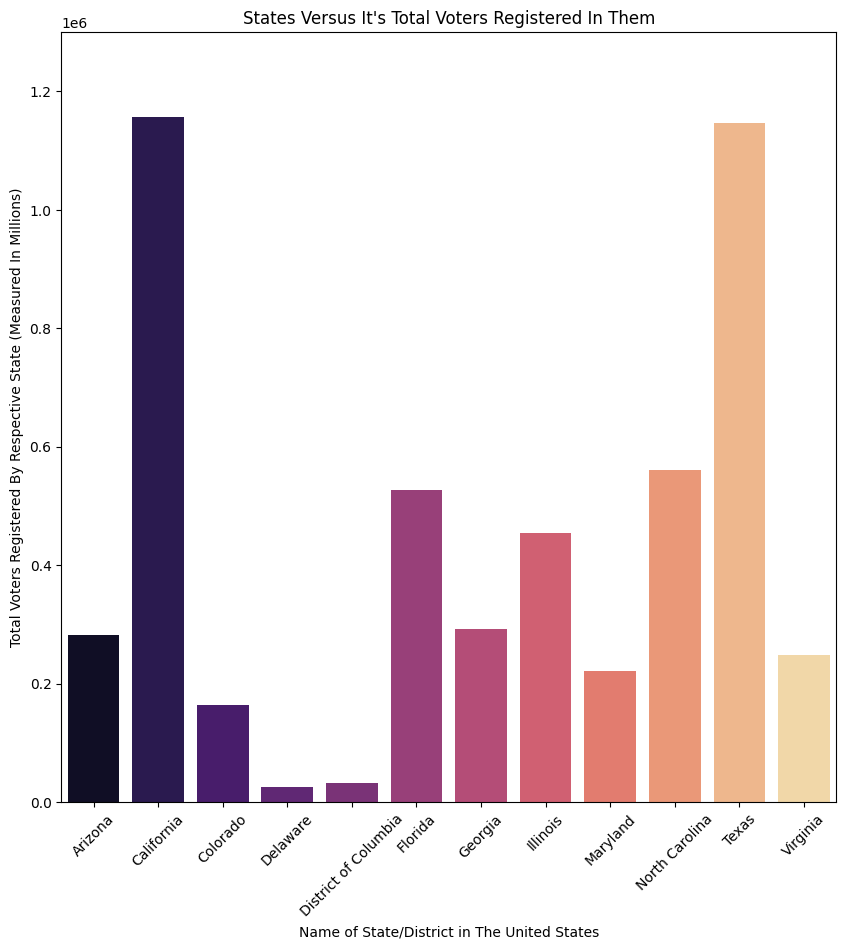

In [210]:
fig = plt.figure(1, figsize=(10, 10))
sns.barplot(data=total_voters_per_state,x="NAME",y="registered_voters", hue="NAME", palette="magma")
plt.title("States Versus It's Total Voters Registered In Them")
plt.xlabel("Name of State/District in The United States",fontsize=10)
plt.ylabel("Total Voters Registered By Respective State (Measured In Millions)",fontsize=10)
plt.ylim(0,1300000)
plt.xticks(rotation=45)
plt.show()

^ Step 14: I created a barplot showing the voter registratation by state. First, I started off by creating a dataframe/a way to show the total voters registered per state. I specifically included a reset_index() function to do this. I was able to do this by grouping the states columns, ("NAME"), with the ["registered_voters"] column, and adding all the states newly registered voters using the .sum() function (in which I also reset_index() for the dataframe). Other things I added to the data visualization include:
1. A figure size of 10,10
2. Clearly legible labels and titles
3. A color palette that is not the default palette

Some of the trends that I noticed is that larger states in population such as California and Texas, align with their position in this barplot. Both California and Texas are just shy of 1.2 million newly registered voters in 2016 and 2020 during the months in the data set. In comparison, states/districts like Delaware and the District of Columbia, which are among some of the smallest states by population, barely even touch the 100,000 total voters registered threshold. Hence, population of states/districts and newly registered total voters in them may have some sort of correlation.

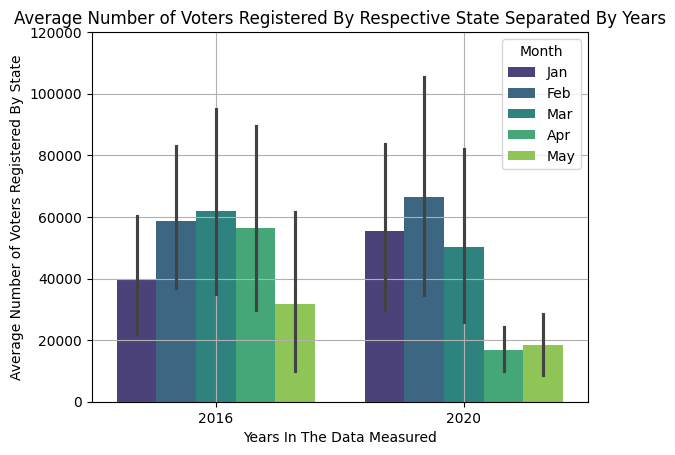

In [211]:
sns.barplot(data=voters, x="Year", y="registered_voters", hue="Month", palette="viridis")
plt.title("Average Number of Voters Registered By Respective State Separated By Years")
plt.xlabel("Years In The Data Measured",fontsize=10)
plt.ylabel("Average Number of Voters Registered By State",fontsize=10)
plt.ylim(0,120000)
plt.grid()
plt.show()

^ Step 15: I created a data visualization or more specifically, a bar plot, comparing voter registation in 2016 and 2020. I did this by plotting on the x axis, the years of 2016 and 2020, and on the y axis, the average total voters registered. I split each each year into the respective months of January, Feburary, March, April, and May, like in the data. Each months bar measures the average number of voters registered consideirng each state and year. Other parts of the plot include:

1. Coloring the graph based on the month.
2. Changing the default color palette used.
3. Adding appropriate labels and a title.

A trend that I identified in the data is that the years 2016 and 2020 are seperately bell curve shaped. However, 2020 is much more right skewed, and 2016 is much more even. Looking closer at the data, months such as April and May, have some of the biggest differences between the years in the graph. This can be attributed to the peak of the coronavirus pandemic, which halted the ability to register to vote in person during the year 2020. The months before the pandemic, such as in January and February of 2016 and 2020, are very similar with minimal differences, other then the fact that without the coronavirus papndemic, it would probably be assumed that new voter registration would've had an upward year (more newly registered voters then 2016) if not for the pandemic. From that point on in 2020, individuals registering to vote dropped noticeably. April in particular saw a decline from 2016 from almost 60,000 to under 20,000 in 2020, almost 1/3 of what it was at. To answer my national trend question, considering the data on the new registered voters in every state, the month (January - May) in 2016 and 2020 that had the highest average of these newly registered voters, was March of 2016, and February of 2020, largely in part due to the pandemic.

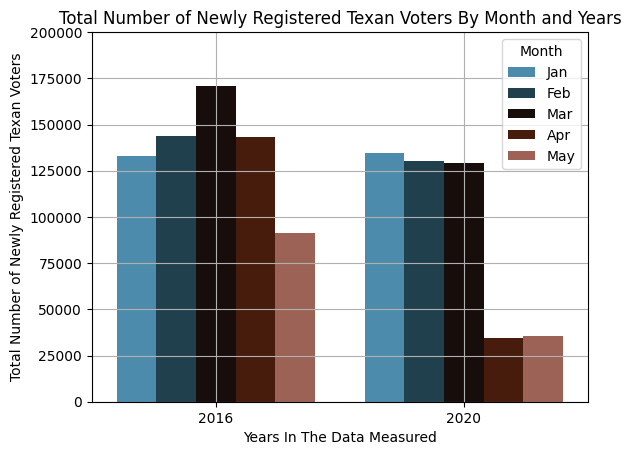

In [212]:
texas_voters = voters.loc[voters.NAME=="Texas"]
texas_voters = texas_voters.reset_index()
sns.barplot(data=texas_voters, x="Year", y="registered_voters", hue="Month", palette="berlin")
plt.title("Total Number of Newly Registered Texan Voters By Month and Years")
plt.xlabel("Years In The Data Measured",fontsize=10)
plt.ylabel("Total Number of Newly Registered Texan Voters",fontsize=10)
plt.ylim(0,200000)
plt.grid()
plt.show()




^ Step 16: Here, I created a data visualization that relates to my state level research question: In the state of Texas, did new voter registration decrease or increase in the months of January - May in 2016 versus 2020 (State Trends)? To create this barplot, first I had to create a new dataframe that only focuses on Texan voters. Then, I set my x axis to year and my y axis to newly registered voters. Based on the hue, I was able to calculate the total number of newly registered Texan voters per month according to year. Each month is correlated to a specific color of the "berlin" palette. To answer that question and to highlight trends in the data, it can clearly be told that voter registration decreased in the months of January - May in 2020 versus 2016. Again, this is in large part do to the pandemic, as we can see that starting from March to May, voters in Texas fell as many as 25,000-125,000 (roughly) in those months in 2020 versus 2016. Despite the months of January and February (when the pandemic was'nt in full swing) being almost the exact same between these years, the following months demonstarte the struggle of voting during the pandemic, and the potential lack of interest/difficulty for Texan individuals to register to vote during this time.

## Part 4: Mapping


In [213]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

fatal: destination path '325-Datasets' already exists and is not an empty directory.


^ Step 17: First I loaded in our shape file data from the mapping unit.

In [214]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us = states.cx[minx:maxx, miny:maxy]

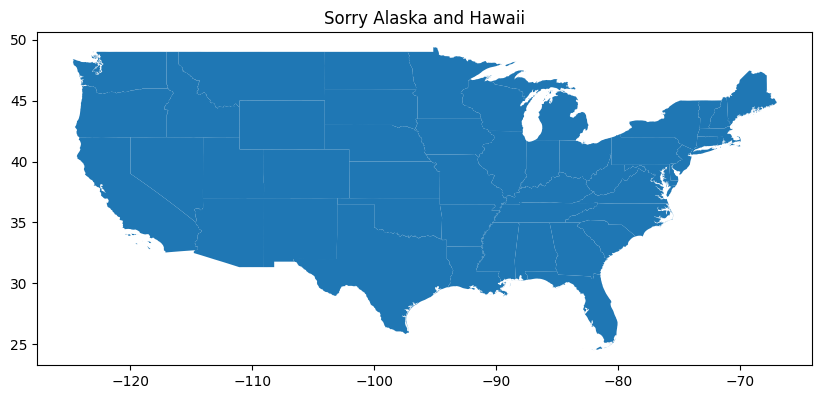

In [215]:
us.plot(figsize=(10, 10))
plt.title("Sorry Alaska and Hawaii")
plt.show()

^ Step 18: Next, I set our continental US bounding box to "us" for the next questions. I even plotted it to see what I was looking at visually.

In [216]:
average_voter_registration_per_state = voters.groupby("NAME")["registered_voters"].mean()
average_voter_registration_per_state = average_voter_registration_per_state.reset_index()
average_voter_registration_per_state

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


^ Step 19: Next, I create a dataframe that shows the average voter registration per state. I did this by grouping state names and newly registered voters into a dataframe, calculated by the mean() function and set into place by the reset_index() in order to show each state/district and it's average registered voters within them. I then show this dataframe.

In [217]:
voting_merged_map = us.merge(average_voter_registration_per_state,on="NAME",how="inner")
voting_merged_map

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


^ Step 20: I then merged the above dataframe results with the mapping data using the merge() function. I used used "inner" for the "how" argument.

In [218]:
voting_merged_map["registered_voters"]=voting_merged_map["registered_voters"].astype(int)

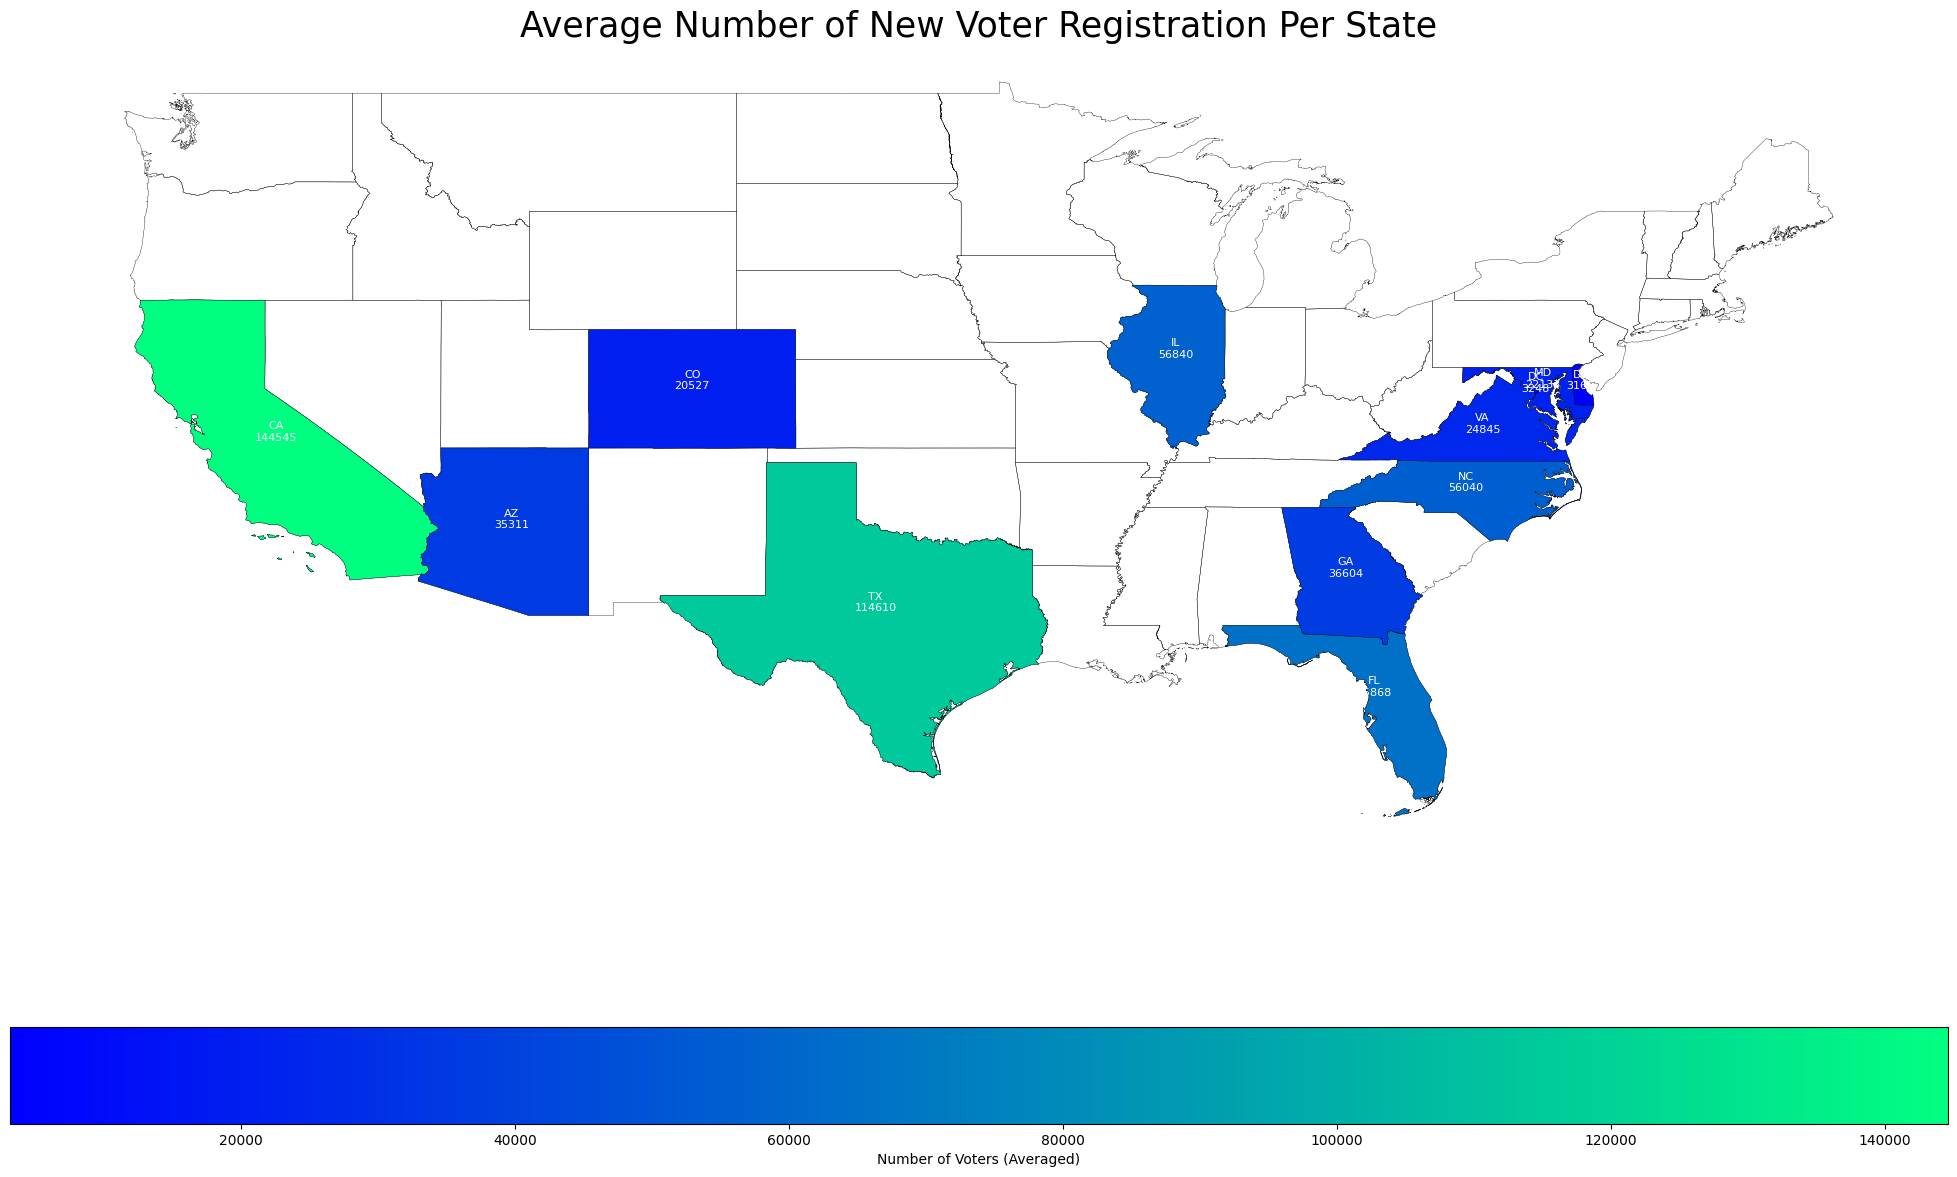

In [219]:
fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()
us.plot(ax=ax,
        edgecolor="black",
        linewidth=.25,
        color="none")
voting_merged_map.plot(ax=ax,
             column="registered_voters",
             legend=True,
             cmap="winter",
             linewidth=.25,
             edgecolor="black",
             legend_kwds={"label": "Number of Voters (Averaged)",
             "orientation": "horizontal"})
voting_merged_map.apply(lambda x: ax.annotate(
              text=x.STUSPS + "\n" + str(int(x.registered_voters)),
              xy=(x.geometry.centroid.x,
                x.geometry.centroid.y),
              ha="center",
              fontsize=8,
              color="white"),
              axis=1)
plt.title("Average Number of New Voter Registration Per State",fontsize=25)
ax.set_axis_off()
plt.show()

Step 21: I then made a map featuring the following:
1. a figure size of 25, 15.
2. A boundary map of the continental US data, with a black linewidth of .25.
3. The states that I have the voter registration information for highlighted in a color map of "winter".
4. A legend and a title.
5. The state abbrevations and average number of registered voters on the map.

I choose winter because most of the other colormaps did not show the state names and data points on them well. I also had to make the letters in the mapping very small because of overlap between states, but I did'nt do it to small where you cant see it. I also left the map boundary as "none" because that better emphasizes the data on "voting_merged_map".

## Part 5: Conclusion




In my conclusion I will go over insights/outcomes of the notebook I have shown, suggestions and ideas I can offer to my client of the government, and possible next steps that I would take if continuing to work on this project.
  Through my many calculations and insights analyzing, interpreting, calculating, visualizing, and mapping data, it is safe to say that the data provided to me was useful in concluding that there are major differences and trends within the year 2016 to 2020. More specifically, my state trend question answered that voter registration decreased overall in the months of January - May in 2020 when compared to 2016. My national trends question was answered, in that the month (January - May) in 2016 and 2020 that had the highest average of these newly registered voters was March in 2016 and February in 2020. But what insight comes out of this? Well, from both questions, it can be deduced that covid-19 played a major role in the differences seen in 2020 versus 2016 which shape the answers to these questions. A lack of interest or difficulty in voting could’ve led to these results. The other visualizations and maps are also important as they showed how certain states such as California and Texas have high volumes of individuals who were generally newly registered to vote in both years, while states like Delaware and the District of Columbia lacked having that high average newly registered voters.
  To amplify the results, some suggestions/ideas I could offer to my client of the government would be a greater access to data, including data like more states being covered as only 24% of all states had data attached to them. Additionally, more months in the year being included would be useful so that we can have a greater understanding for the most popular months people tend to register to vote in. This could give us a better grasp for the most popular months to vote in such as September and October where most states have their voting deadlines and when Voting Day takes place. Additionally, more years being covered would help in understanding trends throughout time more easily and in seeing the probable increase in newly registered voters each year. Being provided these limitations of data could be very beneficial to making larger assumptions that are more accurate and consistent with the real world. What is important to suggest to the government too is that most of my deductions are based on predictions of seen correlation in graphs, not exactly causations. More resources provided to me regarding historical context, other studies into this research between voter registration and covid-19 could provide valuable context into more detailed assumptions.
  Provided these insights, if I was given more data and context to work with, my possible next steps would be testing the strength of the relationship between covid-19 and newly registered voters, maybe looking at an individual basis for seeing how people were directly affected by the virus and their unwillingness to register to vote. Additional steps include  evaluating other possible reasons and causes to the sudden decrease in voter registration, and to see how other contexts possibly led to this. To amplify some visualizations and maps, I think it would be an important step to understand the amount of people voting per capita, as sometimes just showing the amount of total people registering to vote per state can just be an indication of how large the state is as described in one of the visualizations. Overall, the government has full access to my notebook, and my deductions will be useful in understanding the voters data provided.


^ Step 22: A conclusion section that includes:
1. Insights: the insights/outcomes of the notebook
2. Suggestions: Suggestions and ideas I offer to my client
3. Possible next steps: Steps that you would take if continuing to work with this project

Each section is at least 3-4 complete sentenes.

##Github
Posted this to my Github and included the accessible link here and on brightspace:

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Signature: Lukas Karpowich